<h1 align="middle">Ebola</h1>


<img alt="W3Schools" src=".\ebola_pic1.jpg" style="width:50%px;height:30%px;position:relative;left:-5%">

image source: https://www.cdc.gov/vhf/ebola/modules/flexslider/about-ebola-medium.jpg

<h2>What is it?</h2>

Ebola virus disease (EVD), also known as Ebola haemorrhagic fever (EHF) or simply Ebola, is a viral haemorrhagic fever of humans and other primates caused by ebolaviruses.


<h2>Transmission</h2>

Although it is not entirely clear how Ebola initially spreads from animals to humans, the spread is believed to involve direct contact with an infected wild animal or fruit bat.
Ebola disease spreads by direct contact with the blood or other body fluids of a person who has developed symptoms of the disease. Body fluids that may contain Ebola viruses include saliva, mucus, vomit, feces, sweat, tears, breast milk, urine and semen. Entry points for the virus include the nose, mouth, eyes, open wounds, cuts and abrasions. Ebola may be spread through large droplets; however, this is believed to occur only when a person is very sick. The Ebola virus may be able to persist for more than 3 months in the semen after recovery. Dead bodies remain infectious; thus, people handling human remains in practices such as traditional burial rituals or more modern processes such as embalming are at risk.


<h2>Signs and Symptoms</h2>

Signs and symptoms typically start between two days and three weeks after contracting the virus with a fever, sore throat, muscular pain, and headaches. Vomiting, diarrhoea and rash usually follow, along with decreased function of the liver and kidneys. At this time, some people begin to bleed both internally and externally.


<h2>Recovery and death</h2>
Recovery may begin between seven and 14 days after first symptoms. Death, if it occurs, follows typically six to sixteen days from first symptoms and is often due to low blood pressure from fluid loss. In general, bleeding often indicates a worse outcome, and blood loss may result in death. People are often in a coma near the end of life.
Those who survive often have ongoing muscular and joint pain, liver inflammation, and decreased hearing, and may have continued tiredness, continued weakness, decreased appetite, and difficulty returning to pre-illness weight. Problems with vision may develop.
Survivors develop antibodies against Ebola that last at least 10 years, but it is unclear whether they are immune to additional infections.

<h2>Treatment</h2>
On August 2019, two experimental treatments known as REGN-EB3 and mAb114 were found to be 90% effective.

Source:https://en.wikipedia.org/wiki/Ebola_virus_disease

<h2>About this research</h2>

We will try to approach the virus mortality rate and spreading through outbreak of period 2014-2016, the most widespread outbreak of Ebola virus disease in history.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as ticker

In [2]:
#loading the dataset
df = pd.read_csv('ebola_2014_2016_clean.csv')
df.head(5)

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


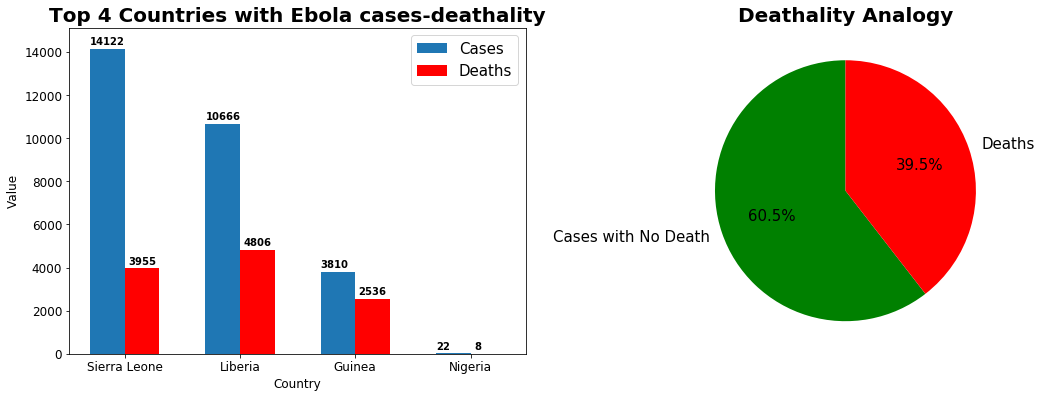

In [3]:
#top 4 countries with most ebola cases
dftemp = df.sort_values(by="No. of confirmed, probable and suspected cases", ascending=False)
countries = dftemp["Country"].unique()[0:4]
cases = []
for c in countries:
    cases.append(np.sort(df.loc[df['Country'] == c]["No. of confirmed, probable and suspected cases"].unique())[-1])
f , ax  = plt.subplots(1,2,figsize=(18,6))
ax[0].bar(np.arange(0,4),cases,width=0.3, label = 'Cases')
ax[0].set_title('Top 4 Countries with Ebola cases-deathality',fontsize=20, fontweight='bold')
ax[0].set_xlabel('Country',fontsize=12)
ax[0].set_ylabel('Value',fontsize=12)
counter = 0
for i in cases:
    ax[0].text(counter-0.15, i+200, int(i), color='black', fontsize=10, c='black', fontweight='bold')
    counter +=1 
ax[0].set_ylim([0,cases[0]+1000])
#top 4 countries in deathality from ebola
dftemp = df.sort_values(by = "No. of confirmed, probable and suspected deaths", ascending = False)
countriesD = dftemp['Country'].unique()[0:4]
deaths = []
for c in countries:
    deaths.append(np.sort(df.loc[dftemp['Country'] == c]["No. of confirmed, probable and suspected deaths"].unique())[-1])
deaths
ax[0].bar(np.arange(0,4)+0.3, deaths, width = 0.3, color = 'red', label = 'Deaths')
ax[0].set_xticks(np.arange(0,4)+0.3/2)
ax[0].set_xticklabels(countries)
ax[0].tick_params(axis='both',labelsize=12)
counter = 0
for i in deaths:
    ax[0].text(counter-0.12+0.3, i+200, int(i), color='black', fontsize=10, c='black', fontweight='bold')
    counter +=1 
ax[0].legend(fontsize=15)
totalCases = 0
totalDeaths = 0
for i in np.arange(0,4):
    totalCases += cases[i]
    totalDeaths += deaths[i]
ax[1].pie([totalCases-totalDeaths,totalDeaths],radius = 1,labels=['Cases with No Death','Deaths'],startangle=90,colors = ['green','red'], textprops={'fontsize': 15},autopct='%1.1f%%')
ax[1].set_title('Deathality Analogy',fontsize=20,fontweight='bold')
plt.show()

<h2>Plotting Οbservations</h2>

From the above we can see the countries most affected by the virus. Ebola virus that started in Guinea was quickly spread to neighboring Sierra Leone and Liberia. Αlthough more people were infected in Sierra, they managed to keep their mortality rates low, unlike the Guinea that most sick people died. It is noteworthy that in spite of the large number of cases, the virus was mainly confined to these 3 countries, as the next big country to the number of cases, Nigeria, had only 22 cases and 8 deaths. In general, we see that the analogy of dethality in total cases is around 39.5%, number indicating the criticality and the risk of the ebolas's epidemic, but also a possible lack of vaccine and proper healthcare in African countries.

d:\anaconda3\envs\ml\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(0, 15000)

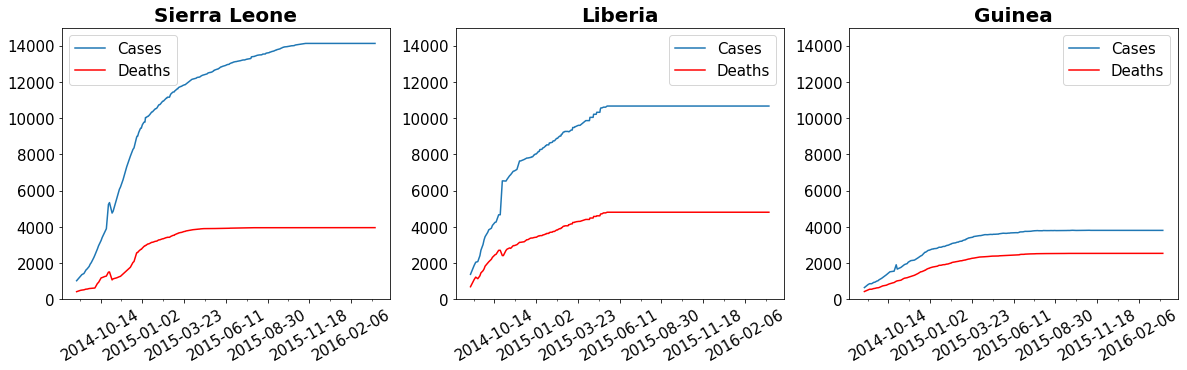

In [4]:
#ploting the virus spreading in time
#we will plot the outbreak timeline in the 3 countries with the most of the cases
#plotting Sierra Leone
f, ax = plt.subplots(1,3,figsize=(20,5))
temp = df.loc[df['Country'] == 'Sierra Leone']['Date'].tolist()
casesSierra = df.loc[df['Country'] == 'Sierra Leone'].sort_values(by='Date')['No. of confirmed, probable and suspected cases'].tolist()
DeathsSierra = df.loc[df['Country'] == 'Sierra Leone'].sort_values(by='Date')['No. of confirmed, probable and suspected deaths'].tolist()
timeSierra = []

for i in temp:
    timeSierra.append(datetime.strptime(i,'%Y-%m-%d'))
ax[0].plot(timeSierra, casesSierra,label='Cases')
ax[0].plot(timeSierra, DeathsSierra,color='red',label='Deaths')
ax[0].set_title('Sierra Leone',fontsize=20,fontweight='bold')
ax[0].tick_params(axis='both', labelsize=15)
ax[0].tick_params(axis='x',rotation=30)
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[0].xaxis.set_minor_locator(ticker.MaxNLocator(16))
ax[0].legend(fontsize='15')
ax[0].set_ylim([0,15000])

#plotting Liberia
temp = df.loc[df['Country'] == 'Liberia']['Date'].tolist()
casesLiberia = df.loc[df['Country'] == 'Liberia'].sort_values(by='Date')['No. of confirmed, probable and suspected cases'].tolist()
DeathsLiberia = df.loc[df['Country'] == 'Liberia'].sort_values(by='Date')['No. of confirmed, probable and suspected deaths'].tolist()
timeLiberia = []
for i in temp:
    timeLiberia.append(datetime.strptime(i,'%Y-%m-%d'))
    
#filtering the data
min = casesLiberia[0]
for i in range(1,len(casesLiberia)):
    if (casesLiberia[i] < min):
        casesLiberia[i] = -1
        DeathsLiberia[i] = -1
        timeLiberia[i] = ''
    else:
        min = casesLiberia[1]
casesLiberia = list(filter(lambda a: a!=-1, casesLiberia))
DeathsLiberia = list(filter(lambda a: a!=-1, DeathsLiberia))
timeLiberia = list(filter(lambda a: a!='', timeLiberia))

ax[1].plot(timeLiberia, casesLiberia,label='Cases')
ax[1].plot(timeLiberia, DeathsLiberia,color='red',label='Deaths')
ax[1].set_title('Liberia',fontsize=20,fontweight='bold')
ax[1].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='x',rotation=30)
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[1].xaxis.set_minor_locator(ticker.MaxNLocator(16))
ax[1].legend(fontsize='15')
ax[1].set_ylim([0,15000])

#plotting Guinea

temp = df.loc[df['Country'] == 'Guinea']['Date'].tolist()
casesGuinea = df.loc[df['Country'] == 'Guinea'].sort_values(by='Date')['No. of confirmed, probable and suspected cases'].tolist()
DeathsGuinea = df.loc[df['Country'] == 'Guinea'].sort_values(by='Date')['No. of confirmed, probable and suspected deaths'].tolist()
timeGuinea = []
for i in temp:
    timeGuinea.append(datetime.strptime(i,'%Y-%m-%d'))

ax[2].plot(timeGuinea, casesGuinea,label='Cases')
ax[2].plot(timeGuinea, DeathsGuinea,color='red',label='Deaths')
ax[2].set_title('Guinea',fontsize=20,fontweight='bold')
ax[2].tick_params(axis='both', labelsize=15)
ax[2].tick_params(axis='x',rotation=30)
ax[2].xaxis.set_major_locator(ticker.MaxNLocator(8))
ax[2].xaxis.set_minor_locator(ticker.MaxNLocator(16))
ax[2].legend(fontsize='15')
ax[2].set_ylim([0,15000])

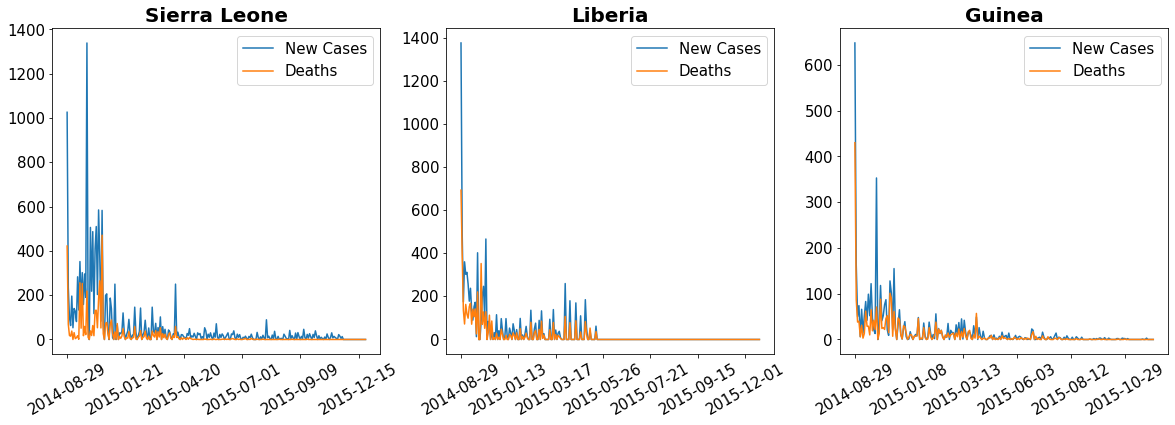

In [25]:
#finding the cases per day...
countries = ['Sierra Leone', 'Liberia', 'Guinea']
f, ax = plt.subplots(1,3,figsize=(20,6))
valC = {}
valD = {}
dates = {}
for i in countries:
    valC[i] = df.loc[df['Country'] == i].sort_values(by='Date')['No. of confirmed, probable and suspected cases'].tolist()
    dates[i] = df.loc[df['Country'] == i].sort_values(by='Date')['Date'].tolist()
    valD[i] = df.loc[df['Country'] == i].sort_values(by='Date')['No. of confirmed, probable and suspected deaths'].tolist()
    for j in range(1,len(valC[i])):
        if (valC[i][j] < valC[i][j-1]) | (valD[i][j] < valD[i][j-1]):
            valC[i][j] = -1
            valD[i][j] = -1
            dates[i][j] = ''
    valC[i] = list(filter(lambda a: a!=-1, valC[i]))
    valD[i] = list(filter(lambda a: a!=-1, valD[i]))
    dates[i] = list(filter(lambda a: a!='', dates[i]))
    tempC = [valC[i][0]]
    tempD = [valD[i][0]]
    for j in np.arange(1,len(valD[i])):
        tC = valC[i][j] - valC[i][j-1]
        tD = valD[i][j] - valD[i][j-1]
        if(tC < 0) | (tD < 0) | (tC > 5000) | (tD > 5000):
            tC = 0
            tD = 0 
        tempC.append(tC)
        tempD.append(tD)
    valC[i] = tempC
    valD[i] = tempD
    
#plot creation
for i in np.arange(3):
    ax[i].set_title(countries[i],fontsize=20,fontweight='bold')
    ax[i].plot(dates[countries[i]],valC[countries[i]],label = 'New Cases')
    ax[i].plot(dates[countries[i]],valD[countries[i]],label = 'Deaths')
    ax[i].xaxis.set_major_locator(ticker.MaxNLocator(7))
    ax[i].tick_params(axis='x',rotation=30, labelsize=15)
    ax[i].tick_params(axis='y', labelsize=15)
    ax[i].legend(fontsize=15)

<h2>Plotting Observations</h2>

Initially we observed that the increase in cases was rapid for the first 3-4 months with averge 200 new cases and from then, although the rate of decline decreased, it took 1 year to stabilize. We then see that in Liberia the increase was significant for 6-7 months and then stabilized. Finally, in Guinea, we understand that the increase in cases has little duration, but the death line (red) is quite close to those in the other two countries, which, as we have said, may be due to a lack of medical care or patient's increased age.

<h2>Next steps</h2>

Νow having an idea of the virus spreading to the countries where most cases were found, we will examine the outbreak to other countries except African.

Text(0.5, 1.0, 'Cases/Deaths Analogy in other Countries')

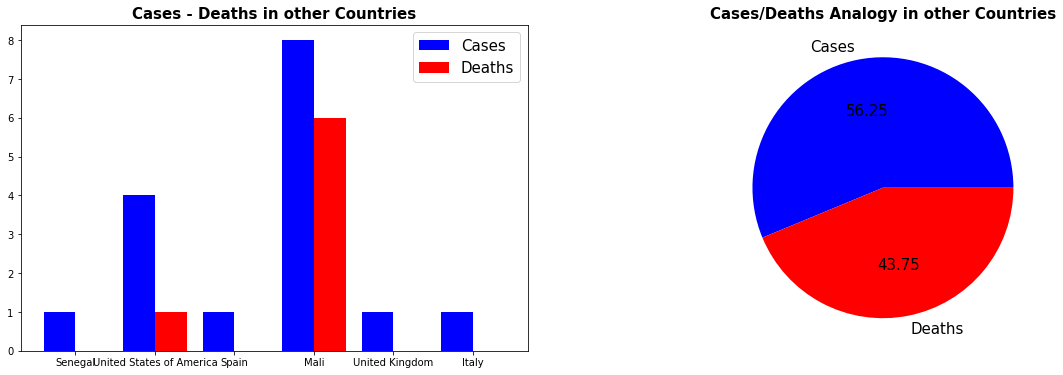

In [28]:
otherCountries = df.loc[(df['Country'] != "Sierra Leone") & (df['Country'] != "Guinea") & (df['Country'] != "Liberia") & (df['Country'] != "Nigeria")]['Country'].unique()
f, ax = plt.subplots(1,2,figsize=(20,6))
counter = 0
totalCases = 0
totalDeaths = 0
for i in otherCountries:
    valC = df.loc[df['Country'] == i].sort_values(by = 'Date')['No. of confirmed, probable and suspected cases'].iloc[-1]
    valD = df.loc[df['Country'] == i].sort_values(by = 'Date')['No. of confirmed, probable and suspected deaths'].iloc[-1]
    totalCases += valC
    totalDeaths += valD
    ax[0].bar(counter,valC,label='Cases',width=0.4,color='blue')
    ax[0].bar(counter+0.4,valD,label='Deaths',width=0.4,color='red')
    counter+=1

ax[0].set_title('Cases - Deaths in other Countries', fontsize=15,fontweight='bold')
ax[0].legend({'Cases':'blue','Deaths':'red'},fontsize=15)
ax[0].set_xticks(np.arange(counter)+0.2)
ax[0].set_xticklabels(otherCountries)
ax[1].pie([totalCases-totalDeaths,totalDeaths],labels = ['Cases','Deaths'],colors=['Blue','Red'],autopct='%.2f',textprops={'fontsize':15})
ax[1].set_title('Cases/Deaths Analogy in other Countries',fontsize=15,fontweight='bold')

<h2> Plotting Observation </h2>

From the above we realize that outbreaks are minimal in other countries. The high death rate cannot be considered a significant statistic since the samples are few. But we understand the urgency of drastic measures to curb the epidemic in developed countries.